# <center>T P 1 M a c h ine Learning sous Python</center>

## Réalisé par : REKIK Salah

### I.	Apprentissage non supervisé : Segmentation et Visualisation


In [2]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

On commencer par utiliser StandardScaler afin de render nos données centrées et réduites. Puis, on applique une analyse en composante principale (PCA) en lui donnent comme paramètre la variance minimale qu’on doit conserver : En effet, quand on réduit les dimensions des données, on perd une portion de la variance.

In [3]:
#Import Data
data = pd.read_csv('./villes.csv', sep=';')
X = data.ix[:, 1:13].values
labels = data.ix[:, 0].values
#Standarize Data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
#Visualize Centred Data with variance=1
pd.DataFrame(data = X).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.638351,1.787480,1.356866,1.167481,1.094137,1.208134,1.117345,1.397672,1.739632,1.932082,1.828366,1.680248
1,0.116831,0.050009,-0.128545,-0.321480,-0.529421,-0.427044,-0.523707,-0.535854,-0.411302,-0.272588,-0.126546,0.049616
2,0.290719,0.278624,0.442767,0.287640,0.105884,-0.310246,-0.125876,-0.027031,-0.001600,0.110833,0.106182,0.221262
3,-1.230801,-1.184509,-0.985513,-0.795241,-0.529421,-0.485443,-0.523707,-0.586736,-0.718578,-0.895647,-1.010910,-1.194813
4,1.594879,1.467420,1.528260,0.761401,0.247063,0.040149,-0.026418,0.227380,0.817803,1.213168,1.409456,1.465691


In [4]:
def doPcaWithMinimumVariance():
    from sklearn.decomposition import PCA
    pca = PCA(0.7)
    pca.fit(X)
    return pca
pca = doPcaWithMinimumVariance()
print(pca.explained_variance_ratio_)
print(pca.n_components_)

def doPcaWith2Components():
    from sklearn.decomposition import PCA
    pca_2 = PCA(n_components=2)
    pca_2.fit(X)
    return pca_2
pca_2 = doPcaWith2Components()
print(pca_2.explained_variance_ratio_)
print(pca_2.n_components_)
first_pca = pca_2.components_[0]
second_pca = pca_2.components_[1]
first_pca
second_pca

[ 0.87268193]
1
[ 0.87268193  0.11720602]
2


array([ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
       -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
        0.26269461,  0.38693688])

#### 2. • Quel est le nombre d’axes à retenir pour conserver un minimum de 70% de l’information représentée dans le nuage initial ?

On obtient comme résultat un seul axe comme nombre à retenir et ceci nous donne 87.26% de la variance réelle.

#### 2.1 • Donner une interprétation des deux premiers axes principaux.

Pour conserver plus que 90% de la variance réelle des données, il faut avoir au moins deux axes comme directions principales des données. En fait, on définit la méthode doPcaWith2Components() pour avoir 98.9% de la variance selon deux directions principales.
On a 12 dimensions (12 mois), et pour chaque dimension, on les températures pour 32 villes différents. En utilisant une PCA en deux composantes principales, on cherche le plan qui respecte le mieux le nuage des données quand on les projette sur ce plan.

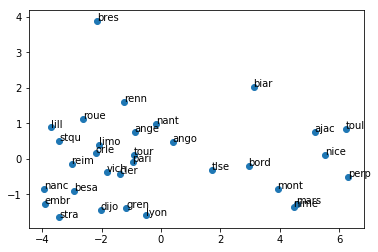

In [5]:
X_pca = pca_2.transform(X)
def doPlotAfterPCA():
    import matplotlib
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.show()
doPlotAfterPCA()

En visualisant les températures des différentes villes en les projetant selon les deux axes principaux trouvés, on trouve la distribution présentée par la figure ci-dessus.
En effet, on remarque qua le premier axe principal oppose Lille à Nice. De plus, le deuxième axe principal oppose Lyon à Brest.
On peut interpréter ces deux axes principaux géographiquement : le premier axe présente une direction du Nord au Sud, alors que le deuxième axe principal présente une direction du West à l’Est.

#### 3. Faire de même pour le fichier "crime.csv".

In [6]:
# Same for crime.csv
#Import Data
data = pd.read_csv('./crime.csv', sep=';')
X_crime = data.ix[:, 1:13].values
labels_crime = data.ix[:, 0].values
#Standarize Data
from sklearn.preprocessing import StandardScaler
X_crime = StandardScaler().fit_transform(X_crime)
#Visualize Centred Data with variance=1
pd.DataFrame(data = X_crime).head()

,0,1,2,3,4,5,6
0,1.764934,-0.050134,-0.312049,0.675094,-0.365337,-1.098488,-0.505749
1,0.876720,2.428393,-0.312049,0.732527,0.092958,0.972028,1.962772
2,0.537108,0.794818,0.161307,1.017679,2.462446,2.499415,0.323707
3,0.354241,0.175187,-0.467548,-0.079601,-0.745847,-1.126041,-1.013974
4,1.059587,2.221849,1.862644,1.478153,1.979625,1.152932,1.493721


In [7]:
def doPcaWithMinimumVariance_crime():
    from sklearn.decomposition import PCA
    pca_crime_1 = PCA(0.7)
    pca_crime_1.fit(X_crime)
    return pca_crime_1
pca_crime_1 = doPcaWithMinimumVariance_crime()
print(pca_crime_1.explained_variance_ratio_)
print(pca_crime_1.n_components_)

def doPcaWith2Components_crime():
    from sklearn.decomposition import PCA
    pca_crime = PCA(n_components=2)
    pca_crime.fit(X_crime)
    return pca_crime
pca_crime = doPcaWith2Components_crime()
print(pca_crime.explained_variance_ratio_)
print(pca_crime.n_components_)
first_pca_crime = pca_crime.components_[0]
second_pca_crime = pca_crime.components_[1]
first_pca_crime
second_pca_crime

[ 0.58785136  0.17696026]
2
[ 0.58785136  0.17696026]
2


array([-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
        0.40231912,  0.50242093])

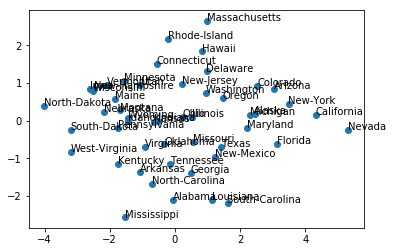

In [8]:
X_pca_crime = pca_crime.transform(X_crime)
def doPlotAfterPCA_crime():
    import matplotlib
    plt.scatter(X_pca_crime[:, 0], X_pca_crime[:, 1])
    for label, x, y in zip(labels_crime, X_pca_crime[:, 0], X_pca_crime[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.show()
doPlotAfterPCA_crime()

On fait la même démarche avec crime.csv. Cette fois, pour conserver 70% de la variance réelle des données, le PCA(.7) donne un nombre d’axe égale 2 axe principaux.
On obtient ainsi deux axes principaux : un axe qui oppose Nevada à North-Dakota et un autre axe qui oppose Massachusetts à Mississippi.


#### 4. • Appliquez la procédure KMeans sur ce jeu de données pour obtenir 3 clusters
On applique KMeans sur la base de données des villes. Pour ceci, on choisit 3 clusters comme nombre K pour la méthode KMeans. En utilisant le code de visualisation, on obtient la figure ci-dessous.
On remarque que le cluster rouge est proche du cluster de couleur rose. Par contre le cluster bleu est bien loin des deux.


In [9]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, random_state=0).fit(X_pca)
clustering.cluster_centers_
clustering = clustering.labels_

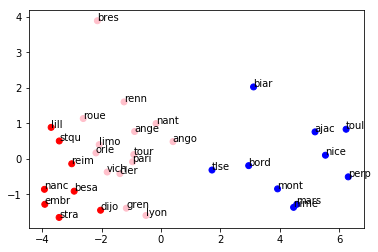

In [10]:
colors = ['red','yellow','blue','pink']
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### 5. Appliquez la procédure AgglomerativeClustering sur ce jeu de données pour obtenir trois clusters avec différentes méthodes d’agrégation (il faut essayer ward et average).
On applique la méthode AgglomerativeClustering deux fois, chaque fois avec un type de Linkage. Ce paramètre Linkage permet de déterminer quelle distance utiliser entre deux ensembles d’observations. L’algorithme fusionne les pairs de clusters qui minimise ce critère.
•	Ward minimise la variance des Clusters à fusionner
•	Average utilise la moyenne des distances entre les observations des deux ensembles.
Après la visualisation du résultat de Clustering, on obtient le résultat suivant :


In [10]:
from sklearn.cluster import AgglomerativeClustering
clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_pca)
clustering_ward = clustering_ward.labels_

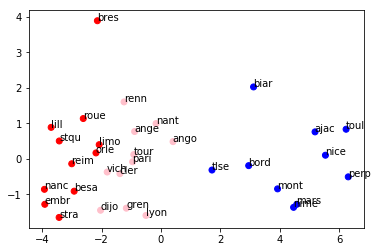

In [11]:
colors = ['red','yellow','blue','pink']
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_ward, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

<b>• Avec la méthode Ward :</b>
On obtient un résultat différent de celui de KMeans. En fait, Bres maintenant fait partie du Cluster rouge. De plus, roue, limo, orle font maintenant partie du cluster Rouge alors qu’elles ont été dans le rose. Encore, dijo a changé du cluster rouge au rose.
Par contre, le cluster bleu est bien stable.


In [15]:
from sklearn.cluster import AgglomerativeClustering
clustering_average = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_pca)
print(clustering_average)
clustering_average = clustering_average.labels_
print(clustering_average)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x000002346618D0D0>)
[0 1 1 1 0 0 2 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1]


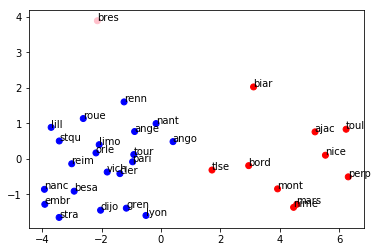

In [13]:
colors = ['red','yellow','blue','pink']
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_average, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

<b>• Avec la méthode Average :</b>
On remarque un changement totale dans l’attribution des villes aux clusters.
En fait, on trouve que les éléments qui faisaient partie du cluster bleu dans KMeans sont maintenant dans un cluster Rouge ( mais les éléments sont les mêmes). De plus, le Cluster Rose est réduit maintenant à une seule ville « bres ». Le reste des observations sont maintenant dans un seul cluster bleu ( alors qu’elles étaient divisées en deux clusters avec la méthode KMeans).

#### 6. Déduire la meilleure partition qui correspond à un indice maximal pour chacun des deux indices Silhouette et Dunn.

In [16]:
def dunn(c, distances):
    """Dunn index for cluster validation (the bigger, the better)"""
    unique_cluster_distances = np.unique(min_cluster_distances(c, distances))
    max_diameter = max(diameter(c, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter

def min_cluster_distances(c, distances):
    """Calculates the distances between the two nearest points of each cluster"""
    min_distances = np.zeros((max(c) + 1, max(c) + 1))
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != c[ii] and distances[i, ii] > min_distances[c[i], c[ii]]:
                min_distances[c[i], c[ii]] = min_distances[c[ii], c[i]] = distances[i, ii]
    return min_distances

def diameter(c, distances):
    """Calculates cluster diameters (the distance between the two farthest data points in a cluster)"""
    diameters = np.zeros(max(c) + 1)
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != -1 or c[ii] != -1 and c[i] == c[ii] and distances[i, ii] > diameters[c[i]]:
                diameters[c[i]] = distances[i, ii]
    return diameters 

In [17]:
from sklearn.metrics.pairwise import euclidean_distances

from sklearn import metrics
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(X_pca)
    print(dunn(clustering, euclidean_distances(X_pca, X_pca)))
    print(metrics.silhouette_score(X_pca, clustering,metric='euclidean'))
    print()

2.93657013328
0.634134503049

0.702204500545
0.396415154321

0.70014707527
0.38049888522

0.572861858826
0.347257432724



On obtient un couple d’indice Dunn et Silhouette pour 2 Clusters uniquement. <b>Ainsi, le meilleur Clustering est fait avec K=2</b>. C’est logique si on considère «bres» comme aberrant dans le clustering Agglomérative avec la méthode Average. 

In [11]:
##II. Apprentissage supervise : Feature engineering et Classification
#Import Data
data = pd.read_csv('./credit.data', header=None, sep='\t')
df=data.values
explic, target = df[:, :-1], df[:, -1]

In [12]:
for i in range(0,688):
    if(data[1][i] == '?'):
        data[1][i] = np.nan
    else:
        data[1][i] = float(data[1][i])
    if(data[13][i] == '?'):
        data[13][i] = np.nan
    else:
        data[13][i] = float(data[13][i])
    #data = data.astype(np.float)

In [14]:
data_only_numeric = data[[1,2,7,10,13,14,15]]
data_only_numeric = data_only_numeric.dropna() 
#data_only_numeric = data_only_numeric[~np.isnan(explic_numeric_only).any(axis=1)]
explic_numeric_only_values = data_only_numeric.values
#explic_numeric_only = explic_numeric_only_values[~np.isnan(explic_numeric_only).any(axis=1)]
explic_numeric_only, target_numeric_only = explic_numeric_only_values[:, :-1], explic_numeric_only_values[:, -1]
explic_numeric_only = explic_numeric_only.astype(float)

In [15]:
explic_numeric_only.shape

(666, 6)

In [17]:
#for i in range(0,666):
#    if(target_numeric_only[i] == '-'):
#        target_numeric_only[i] = 0
#    if(target_numeric_only[i] == '+'):
#        target_numeric_only[i] = 1
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(['-', '+'])
print(lb)
print(lb.classes_)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
['+' '-']


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, MiniBatchKMeans #for fun although it is not supervised learning
from sklearn.mixture import GaussianMixture #EM
from sklearn.tree import DecisionTreeClassifier #cart, id3 and decision stump (1 lvl tree)
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier #bagging, RF and adaboost

from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, cohen_kappa_score, make_scorer
import time

clfs = {
    'RF': RandomForestClassifier(n_estimators=50),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'NBayes': GaussianNB(),
    'CART': tree.DecisionTreeClassifier(),
    'Adaboost_depth1':AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50),
    'Adaboost_depth2':AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=50)
    #'KMeans':KMeans(n_clusters=2),
}

auc_scorer=make_scorer(roc_auc_score)
acc_scorer=make_scorer(accuracy_score)
precision_scorer=make_scorer(precision_score)
kappa_scorer=make_scorer(cohen_kappa_score)

kf10=KFold(n_splits=10,	shuffle=True,	random_state=0)	
kf5=KFold(n_splits=5,	shuffle=True,	random_state=0)	

def run_classifiers(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        clf = clf.fit(X, Y)
        init_time = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        #precision_scores=cross_val_score(estimator=clf,X=X,y=Y,cv=kf,scoring=precision_scorer)
        kappa_scores=cross_val_score(estimator=clf,X=X,y=Y,cv=kf,scoring=kappa_scorer)
        algo_time = time.time() - init_time
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("kappa for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(kappa_scores), np.std(kappa_scores)))
        #print("time for {0} is: %f ".algo_time)
        print("execution time is: %s seconds" % algo_time)
run_classifiers(clfs, explic_numeric_only, target_numeric_only)

Accuracy for RF is: 0.784 +/- 0.050
kappa for RF is: 0.537 +/- 0.110
execution time is: 1.4369511604309082 seconds
Accuracy for KNN is: 0.668 +/- 0.046
kappa for KNN is: 0.324 +/- 0.088
execution time is: 0.03886985778808594 seconds
Accuracy for NBayes is: 0.716 +/- 0.050
kappa for NBayes is: 0.398 +/- 0.077
execution time is: 0.034060001373291016 seconds
Accuracy for CART is: 0.715 +/- 0.054
kappa for CART is: 0.423 +/- 0.085
execution time is: 0.05817055702209473 seconds
Accuracy for Adaboost_depth1 is: 0.770 +/- 0.063
kappa for Adaboost_depth1 is: 0.532 +/- 0.120
execution time is: 1.9234049320220947 seconds
Accuracy for Adaboost_depth2 is: 0.739 +/- 0.062
kappa for Adaboost_depth2 is: 0.475 +/- 0.107
execution time is: 2.222069501876831 seconds


Comparons les différents algotihmes. On peut noter que :
* On note que l'algorithme Adaboost avec des arbres de profondeur 1 est meilleur qu'avec des arbres de profondeur 2 malgrès que Adaboost avec un profondeur de 2 met plus de temps à s'exécuter.
* On remarque que le Kappa de ces dfférents algorithmes sont aux alentour de 0.5. Ceci veut dire que ces algorithmes perfoment à peine  mieux que le hasard!

PS: j'obtient une petite erreur que j'ai pas encore debeugué, quand j'ajoute EM ou Kmeans à la liste des algorithmes,mais semble ne pas affecter le résultat...

### Evaluation avec normalisation des variables continues

Normalisons les variables continues.

In [22]:
#Normalisation des variables continues
from sklearn.preprocessing import StandardScaler
explic_numeric_only_centred = StandardScaler().fit_transform(explic_numeric_only)
run_classifiers(clfs, explic_numeric_only_centred, target_numeric_only)

Accuracy for RF is: 0.782 +/- 0.052
kappa for RF is: 0.558 +/- 0.096
execution time is: 1.4920861721038818 seconds
Accuracy for KNN is: 0.742 +/- 0.059
kappa for KNN is: 0.471 +/- 0.111
execution time is: 0.05113577842712402 seconds
Accuracy for NBayes is: 0.716 +/- 0.050
kappa for NBayes is: 0.398 +/- 0.077
execution time is: 0.03208589553833008 seconds
Accuracy for CART is: 0.715 +/- 0.046
kappa for CART is: 0.408 +/- 0.086
execution time is: 0.059157609939575195 seconds
Accuracy for Adaboost_depth1 is: 0.770 +/- 0.063
kappa for Adaboost_depth1 is: 0.532 +/- 0.120
execution time is: 1.7255926132202148 seconds
Accuracy for Adaboost_depth2 is: 0.740 +/- 0.056
kappa for Adaboost_depth2 is: 0.475 +/- 0.102
execution time is: 2.0008959770202637 seconds


### PCA 
On applique une Analyse des Composantes Principales aux données.

In [23]:
from sklearn.decomposition import PCA

pca_ville = PCA(0.7)
pca_ville.fit(explic_numeric_only_centred)
explic_numeric_only_centred_with_pca = pca_ville.transform(explic_numeric_only_centred)
print(pca_ville.explained_variance_ratio_)
print(pca_ville.n_components_)
first_pca_ville = pca_ville.components_[0]
second_pca_ville = pca_ville.components_[1]
third_pca_ville = pca_ville.components_[1]
fourth_pca_ville = pca_ville.components_[1]
print(first_pca_ville)
print(second_pca_ville)
print(third_pca_ville)
print(fourth_pca_ville)

[ 0.32303239  0.17812337  0.1624939   0.13241474]
4
[ 0.45499012  0.47793667  0.53532047  0.45612324 -0.23760746  0.11613271]
[ 0.07582484 -0.06039093  0.12243534  0.01486247  0.67874305  0.71742602]
[ 0.07582484 -0.06039093  0.12243534  0.01486247  0.67874305  0.71742602]
[ 0.07582484 -0.06039093  0.12243534  0.01486247  0.67874305  0.71742602]


In [24]:
run_classifiers(clfs, explic_numeric_only_centred_with_pca, target_numeric_only)

Accuracy for RF is: 0.718 +/- 0.057
kappa for RF is: 0.434 +/- 0.085
execution time is: 1.6564247608184814 seconds
Accuracy for KNN is: 0.745 +/- 0.035
kappa for KNN is: 0.477 +/- 0.069
execution time is: 0.03125309944152832 seconds
Accuracy for NBayes is: 0.676 +/- 0.055
kappa for NBayes is: 0.312 +/- 0.100
execution time is: 0.03125405311584473 seconds
Accuracy for CART is: 0.668 +/- 0.048
kappa for CART is: 0.309 +/- 0.098
execution time is: 0.06254196166992188 seconds
Accuracy for Adaboost_depth1 is: 0.731 +/- 0.055
kappa for Adaboost_depth1 is: 0.452 +/- 0.106
execution time is: 1.6407604217529297 seconds
Accuracy for Adaboost_depth2 is: 0.683 +/- 0.057
kappa for Adaboost_depth2 is: 0.353 +/- 0.109
execution time is: 1.9377498626708984 seconds


* On remarque que les Kappa ont diminué!!! Sauf KNN, les autres ont un Kappa inférieur à 0.5.
* Même en Accuracy, les performances des algorithmes ont diminué.
#### Interprétation
Avec le PCA, on a diminué le nombre de dimension de notre jeux de donnée. Ceci a clairement diminué les performances des algorithmes. Vu que le PCA nous donne des directions principales, ceci semble logique de ne pas avoir une meilleur performance avec seulement ces direction. C'est pourquoi, on est confient qu'on pourrait avoir une meilleur performance si on associe ces directions principales au donnée originales.

#### PCA concaténée avec données originales:

On concatène les deux jeux de données. On comparera le résultat à celui obtenu sur les données centrées réduites : 

In [25]:
data_concat=np.append(explic_numeric_only_centred,explic_numeric_only_centred_with_pca,axis=1)
answer_data_concat=run_classifiers(clfs, data_concat, target_numeric_only)

Accuracy for RF is: 0.779 +/- 0.057
kappa for RF is: 0.521 +/- 0.085
execution time is: 1.6563804149627686 seconds
Accuracy for KNN is: 0.769 +/- 0.040
kappa for KNN is: 0.525 +/- 0.075
execution time is: 0.04687666893005371 seconds
Accuracy for NBayes is: 0.710 +/- 0.047
kappa for NBayes is: 0.387 +/- 0.076
execution time is: 0.031253814697265625 seconds
Accuracy for CART is: 0.712 +/- 0.060
kappa for CART is: 0.407 +/- 0.109
execution time is: 0.09380173683166504 seconds
Accuracy for Adaboost_depth1 is: 0.773 +/- 0.065
kappa for Adaboost_depth1 is: 0.536 +/- 0.125
execution time is: 1.7814381122589111 seconds
Accuracy for Adaboost_depth2 is: 0.739 +/- 0.049
kappa for Adaboost_depth2 is: 0.463 +/- 0.091
execution time is: 2.4064993858337402 seconds


On remarque qu'on obtient un résultat mieux que celle obtenu avec seulement les données obtenus pas PCA, mais pas meilleur. En fait, l'accuracy reste autour de 0.7 et le Kappa à peine > 0.5 pour quelques algorithmes.
#### Interprétation
On peut interpréter ceci par le fait que les directions obtenus par PCA ne sont pas vraiment loin de notre jeu de données Autrement dit, notre jeu de donnée est suffisamment bien fait pour exprimer toutes les informations nécessaire pour avoir un bon résultat.

On pourrait avoir plus de performance avec une telle concaténation(PCA + données normale) si les axes du PCA décrivent notre jeux de donnée mieux que les données d'origine.

### Feature selection

En utilisant l'algorithme random forest, on peut faire une selection de features sur les données normalisée. 


[ 0.15285633  0.13161419  0.19313886  0.18908152  0.12842293  0.20488616]


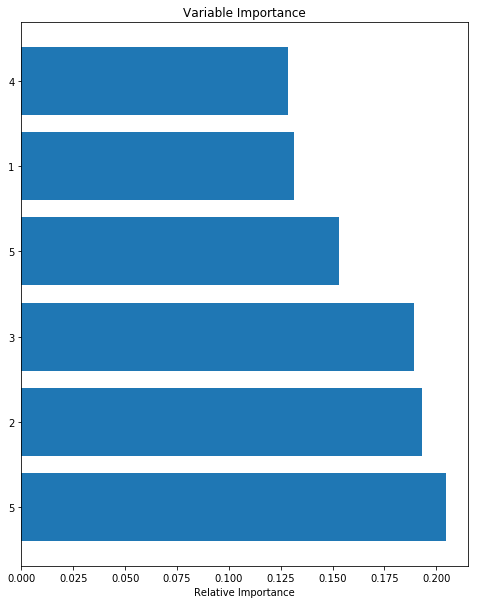

In [26]:
def variableSelection(X2,Y2):
    fig=plt.figure(figsize=(8,10))
    clf = RandomForestClassifier()
    clf.fit(X2, Y2)
    importances=clf.feature_importances_
    print(importances)
    sorted_idx = np.argsort(importances)[::-1]
    features =np.arange(1, X2.shape[1])
    padding = np.arange(X2.size/len(X2)) + 0.5
    plt.barh(padding, importances[sorted_idx], align='center')
    plt.yticks(padding, features[sorted_idx-1])
    plt.xlabel("Relative Importance")
    plt.title("Variable Importance")
    plt.show()
variableSelection(explic_numeric_only, target_numeric_only)

On conserve les 3 features les plus importants: 

In [27]:
data_selected=explic_numeric_only[:,[5,3,2]]
run_classifiers(clfs, explic_numeric_only, target_numeric_only)

Accuracy for RF is: 0.784 +/- 0.058
kappa for RF is: 0.570 +/- 0.100
execution time is: 1.5470013618469238 seconds
Accuracy for KNN is: 0.668 +/- 0.046
kappa for KNN is: 0.324 +/- 0.088
execution time is: 0.06250524520874023 seconds
Accuracy for NBayes is: 0.716 +/- 0.050
kappa for NBayes is: 0.398 +/- 0.077
execution time is: 0.04687857627868652 seconds
Accuracy for CART is: 0.719 +/- 0.047
kappa for CART is: 0.440 +/- 0.075
execution time is: 0.09376096725463867 seconds
Accuracy for Adaboost_depth1 is: 0.770 +/- 0.063
kappa for Adaboost_depth1 is: 0.532 +/- 0.120
execution time is: 2.3283708095550537 seconds
Accuracy for Adaboost_depth2 is: 0.740 +/- 0.056
kappa for Adaboost_depth2 is: 0.475 +/- 0.102
execution time is: 2.7346622943878174 seconds


On voit bien que le résultat obtenue est semblable au résultat des données à l'origine.
#### Interprétation
Ceci indique que ces trois variables détiennent vraiment la plupart de l'information présentée par notre jeu de donnée. Ainsi, le Feature selection performe bien si on veut choisir quelque variables afin de réduire la dimension du jeu de donnée.

In [24]:
print(explic.shape)
print(target.shape)

(688, 15)
(688,)


### 2) Etude sur la totalité de la base

### Prétraitement des données

On commence par utiliser une stratégie d'imputation des valeurs manquantes:
* Les valeures manquantes catégorielles seront remplacées par le mode le plus fréquent de la variable
* Les valeures manquantes numériques seront remplacées par la moyenne de la variable

In [29]:
data = pd.read_csv('./credit.data', header=None, sep='\t')
df=data.values
explic, target = df[:, :-1], df[:, -1]

data_only_numeric = data[[1,2,7,10,13,14,15]]
explic_numeric_only_values = data_only_numeric.values
explic_numeric_only, target_numeric_only = explic_numeric_only_values[:, :-1], explic_numeric_only_values[:, -1]

data_only_categoriel = data[[0,3,4,5,6,8,9,11,12]]
data_only_categoriel_values = data_only_categoriel.values
#print(data_only_categoriel)

#Impute for categorial variables:
from sklearn.preprocessing import Imputer
X_cat = np.copy(data_only_categoriel_values)
for col_id in range(0,9):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])
#print(X_cat)

#Impute for numeric variables:
X_num = np.copy(explic_numeric_only)
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)
#print(X_num)

[ 0.02153436  0.04524753  0.04196373  0.01427529  0.0410192   0.03137473
  0.00305302  0.00297241  0.          0.00522282  0.0038174   0.00200421
  0.00053383  0.00485093  0.00510747  0.00639933  0.00844827  0.0007771
  0.00106874  0.00298771  0.00350329  0.00067228  0.00360834  0.00137709
  0.00274225  0.          0.00247897  0.00289947  0.0056252   0.          0.0064882
  0.00430282  0.00040943  0.00168883  0.          0.00348539  0.
  0.22082405  0.13670657  0.02739791  0.02996343  0.00405796  0.0051537
  0.00446771  0.0043732   0.00140637  0.10590618  0.03323966  0.02122526
  0.03268253  0.02634265  0.03294526  0.03136795]


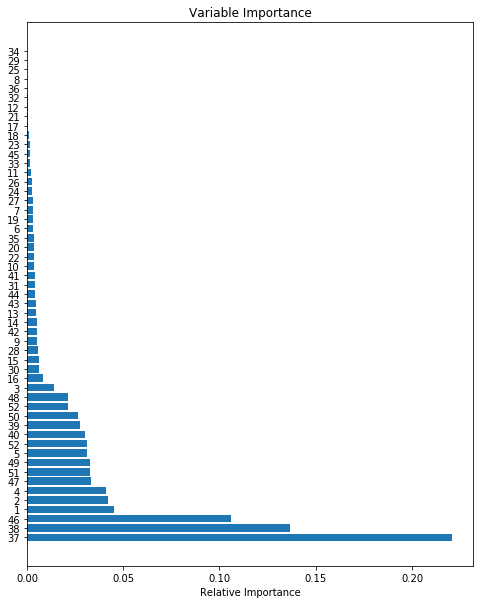

In [30]:
from sklearn.preprocessing import OneHotEncoder
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()
X_num = StandardScaler().fit_transform(X_num)
s = np.concatenate((X_num, X_cat_bin), axis=1)
# Ajout des donnée du PCA
pca=PCA(n_components=0.7)
s_pca=pca.fit_transform(s)
s_total=np.append(s,s_pca,axis=1)
variableSelection(s_total, target_numeric_only)

On prend ainsi les features les plus important afin d'étudier les performances du modèle. On prend les 15 meilleurs features ( pour la simple raison: en passant du feature 51 au feature 26, on perd beaucoup d'amplitude selon le graphique ci-dessus ).

In [31]:
s_total_selected=s_total[:,[37,38,46,3,49,1,5,52,47,4,50,48,2,40,51]]

On teste ce jeu de donnée

In [ ]:
run_classifiers(clfs, s_total_selected, target_numeric_only)

Accuracy for RF is: 0.853 +/- 0.040
kappa for RF is: 0.727 +/- 0.064
execution time is: 1.6877055168151855 seconds
Accuracy for KNN is: 0.853 +/- 0.040
kappa for KNN is: 0.701 +/- 0.083
execution time is: 0.06248164176940918 seconds
Accuracy for NBayes is: 0.823 +/- 0.040
kappa for NBayes is: 0.633 +/- 0.089
execution time is: 0.03125190734863281 seconds
Accuracy for CART is: 0.826 +/- 0.058
kappa for CART is: 0.653 +/- 0.102
execution time is: 0.09372067451477051 seconds
Accuracy for Adaboost_depth1 is: 0.828 +/- 0.048
kappa for Adaboost_depth1 is: 0.652 +/- 0.097
execution time is: 2.156493902206421 seconds
Accuracy for Adaboost_depth2 is: 0.837 +/- 0.056
kappa for Adaboost_depth2 is: 0.671 +/- 0.112
execution time is: 3.42224383354187 seconds


On a bien des meilleurs performances ces features :
* Le kappa est en moyenne bien meilleur, les meilleur modèles approchent 0.7, ce qui commence à être correct.
* L'accuracy aussi a été bien amélioré surtout por le Random forest (0.869).

__On peut déduire que le radom forest est le meilleur algorithme pour ce jeu de donnée vu son Kappa est correct (0.738) et son accuracy élevée. De plus, son temps d'exécution n'est pas si mal.__


### III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

#### Methode CountVectorize

Il s'agit de la méthode la plus simple que nous allons tester. Elle prend en compte seulement la fréquence des termes dans le corpus.

In [ ]:
#III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification
from sklearn.feature_extraction.text import CountVectorizer
import time 
vectorizer = CountVectorizer()
messages = pd.read_csv('./SMSSpamCollection.data',sep='\t',names=['labels','message'])
X = vectorizer.fit_transform(messages['message'])
#message4 = messages['message'][3]
#print(message4)
#bow4 = vectorizer.transform([message4])
#print(bow4)
print ('Shape of Sparse Matrix: ', X.shape)
print ('Amount of Non-Zero occurences: ', X.nnz)
print ('sparsity: %.2f%%' % (100.0 * X.nnz /(X.shape[0] * X.shape[1])))
run_classifiers(clfs, X.toarray(), messages['labels'])

Shape of Sparse Matrix:  (5572, 8713)
Amount of Non-Zero occurences:  74169
sparsity: 0.15%
Accuracy for RF is: 0.978 +/- 0.005
kappa for RF is: 0.890 +/- 0.029
execution time is: 251.50681614875793 seconds
Accuracy for KNN is: 0.895 +/- 0.015
kappa for KNN is: 0.321 +/- 0.053
execution time is: 900.1736805438995 seconds
Accuracy for NBayes is: 0.900 +/- 0.016
kappa for NBayes is: 0.652 +/- 0.055
execution time is: 23.29058074951172 seconds
Accuracy for CART is: 0.970 +/- 0.007
kappa for CART is: 0.872 +/- 0.024
execution time is: 434.5432217121124 seconds
Accuracy for Adaboost_depth1 is: 0.972 +/- 0.005
kappa for Adaboost_depth1 is: 0.872 +/- 0.017
execution time is: 670.3112316131592 seconds


On visualise la sparcité de la matrice (0.15%). Ceci nous indique que la matrice n'est pas trop sparcée et donc susceptible de nous donner un bon résultat.
Après avoir exécuté les différents algorithmes dans clf, on obtient pour chaque algorithme la moyenne, l'écart type pour le 10-cross-validation, ainsi que le temps d'exécution.
on remarque que la moyenne varie peut entre les 3 algorithmes, alors que l'écart-type et bien supérieur pour le KNN et le Naive Bayes.
De plus, le temps d'exécution pour le KNN est très élevé par rapport aux autres.

#### Methode Tf Idf 
Cette méthode prend en compte les occurences des termes dans le corpus mais aussi au sein de chaque document, afin d'attribuer un meilleur score aux termes qui 'décrivent' et 'différencient' les documents entre eux. 

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)

from sklearn.metrics import classification_report
def run_classifiers_with_prediction(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        clf = clf.fit(X, Y)
        init_time = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        algo_time = time.time() - init_time
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        #print("time for {0} is: %f ".algo_time)
        print("execution time is: %s seconds" % algo_time)
        all_predictions = clf.predict(X)
        print (classification_report(messages['labels'], all_predictions))
run_classifiers_with_prediction(clfs, tfidf.toarray(),messages['labels'])

Accuracy for RF is: 0.978 +/- 0.005
execution time is: 144.99784350395203 seconds
             precision    recall  f1-score   support

        ham       1.00      1.00      1.00      4825
       spam       1.00      1.00      1.00       747

avg / total       1.00      1.00      1.00      5572

Accuracy for KNN is: 0.946 +/- 0.012
execution time is: 508.03864216804504 seconds
             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      4825
       spam       1.00      0.64      0.78       747

avg / total       0.95      0.95      0.95      5572

Accuracy for NBayes is: 0.897 +/- 0.016
execution time is: 12.133416175842285 seconds
             precision    recall  f1-score   support

        ham       1.00      0.93      0.97      4825
       spam       0.70      1.00      0.82       747

avg / total       0.96      0.94      0.95      5572

Accuracy for CART is: 0.972 +/- 0.005
execution time is: 223.2936315536499 seconds
             precisio

<b>• Avec Tf–idf term weighting:</b>
On remarque que la moyenne a augmenté par rapport à l'exécution précedente. De plus, l'écart type a bien dimunier pour KNN surtout.

#### Methode SVD

Il s'agit d'une méthode de réduction de dimension permet de projeter un document dans l'espace des concepts, i.e. de le traiter plus selon son sens.

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
truncSvd = svd.fit_transform(X)
run_classifiers_with_prediction(clfs, truncSvd,messages['labels'])

Accuracy for RF is: 0.966 +/- 0.006
execution time is: 3.182539701461792 seconds
             precision    recall  f1-score   support

        ham       1.00      1.00      1.00      4825
       spam       1.00      0.99      1.00       747

avg / total       1.00      1.00      1.00      5572

Accuracy for KNN is: 0.955 +/- 0.005
execution time is: 0.1412343978881836 seconds
             precision    recall  f1-score   support

        ham       0.96      0.99      0.98      4825
       spam       0.94      0.76      0.84       747

avg / total       0.96      0.96      0.96      5572

Accuracy for NBayes is: 0.901 +/- 0.008
execution time is: 0.05506753921508789 seconds
             precision    recall  f1-score   support

        ham       0.93      0.96      0.95      4825
       spam       0.69      0.50      0.58       747

avg / total       0.89      0.90      0.90      5572

Accuracy for CART is: 0.946 +/- 0.006
execution time is: 0.2585887908935547 seconds
             precisi

<b>• Avec TruncatedSVD:</b>
On remarque que la moyenne est semblable à l'exécution précedente. De plus, l'écart type a bien dimunier pour tous les algorithmes.
Pour Nbayes et KNN, la précision et le recall ont diminué. CART et RF ont toujours une précision et recall égaux à 1.

### IV. Détection d’anomalies
#### 1. Sur la base de données Mouse

               X1          X2
count  500.000000  500.000000
mean     0.505892    0.599706
std      0.191763    0.156863
min      0.040555    0.138940
25%      0.328481    0.469010
50%      0.504702    0.629494
75%      0.681430    0.735364
max      0.916030    0.897028
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
X1    500 non-null float64
X2    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB
None


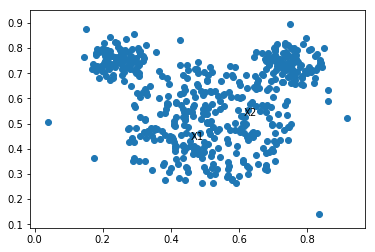

(500,)


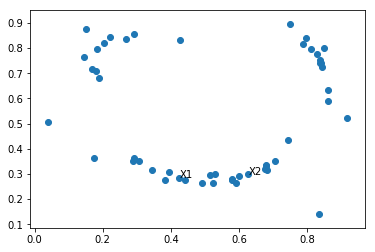

In [26]:
#1. Sur la base de données Mouse
points = pd.read_csv('./mouse.txt',sep=' ',names=['X1','X2'])
points
print(points.describe())
print(points.info())
plt.scatter(points['X1'], points['X2'])
labels = ['X1', 'X2']
for label, x, y in zip(labels, points['X1'], points['X2']):
    plt.annotate(label, xy=(x, y), textcoords='offset points')
plt.show()

from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf = clf.fit(points)
anomaly_score = clf.decision_function(points)
outlier = clf.predict(points)
#print(anomaly_score)
#print(outlier)
print(outlier.shape)
#Visualize outliers
columns = ['X1','X2']
outliers_ = pd.DataFrame(columns=columns)

for i in range(500):
    if(outlier[i] == -1):
        outliers_i = pd.DataFrame([[points['X1'][i], points['X2'][i]]], columns=columns)
        outliers_ = outliers_.append(outliers_i, ignore_index=True)
outliers_
plt.scatter(outliers_['X1'], outliers_['X2'])
for label, x, y in zip(labels, outliers_['X1'], outliers_['X2']):
    plt.annotate(label, xy=(x, y), textcoords='offset points')
plt.show()

En considérant que les -1 obtenus dans outlier correspondent à des outliers, on a pû visualiser les points aberrant dans la base de donnée avec la figure ci-dessus.

#### 2. Sur le jeu de données des cartes de crédits

In [28]:
#2. Sur le jeu de données des cartes de crédits
instances = pd.read_csv('./creditcard.csv',sep=',')
instances
slice1 = instances.loc[instances['Class'] == 0]
df_random_5000 = slice1.sample(n=5000)
slice2 = instances.loc[instances['Class'] == 1]
slice2
prepared_data = df_random_5000.append(slice2, ignore_index=True)
prepared_data = prepared_data.drop('Time', 1)
#Predict
Intance_Isolation_Forest=IsolationForest(contamination=0.09)
Intance_Isolation_Forest.fit(prepared_data)
result=Intance_Isolation_Forest.predict(prepared_data)
result[result==-1]=0
result=1-result

rng = np.random.RandomState(42)
clf_credit = IsolationForest(max_samples=100, random_state=rng)
clf_credit = clf_credit.fit(prepared_data)
anomaly_score_credit = clf_credit.decision_function(prepared_data)
outlier_credit = clf_credit.predict(prepared_data)
print(outlier_credit.shape)

(5492,)


On construit notre matrice de confusion:

* En colonne, on a les prédictions
* En ligne, on a le statut des instances dans la base de donnée originale.

In [31]:
from sklearn.metrics import confusion_matrix

target=prepared_data['Class']
prepared_data=prepared_data.astype(bool)
target=target.astype(bool)
target[target>0]=1

conf=pd.DataFrame(confusion_matrix(result,target))
conf.columns=['Predit Normal','Predit Fraud']
conf.index=['Normal','Fraud']
print(conf)

        Predit Normal  Predit Fraud
Normal           4867           130
Fraud             133           362


On calcule:
* sensitivity : TP/(TP + FN ) : 0.97
* specificity  : TN/(TN + FP) : 0.77
* F1 score: 2TP/(2TP + FP + FN) : 0.978

=> ce modèle semble acceptable pour ce jeu de donnée, vu qu'on a un bon F1 score.

#### 3.Sur le jeu de données des SMS

In [30]:
messages = pd.read_csv('./SMSSpamCollection.data',sep='\t',names=['labels','message'])
messages
slice1_msg = messages.loc[messages['labels'] == 'ham']
slice1_msg
msg_random = slice1_msg.sample(n=2787)
slice2_msg = messages.loc[messages['labels'] == 'spam']
slice2_random = slice2_msg.sample(n=20)
slice2_random
prepared_data_msg = msg_random.append(slice2_random, ignore_index=True)
prepared_data_msg
X_msg = vectorizer.fit_transform(prepared_data_msg['message'])
target=list(prepared_data_msg['labels'])
target=[0 if x=='ham' else 1 for x in target]
target = np.copy(target)
#Predict
Intance_Isolation_Forest=IsolationForest(contamination=0.09)
Intance_Isolation_Forest.fit(X_msg)
result=Intance_Isolation_Forest.predict(X_msg)
result[result==-1]=0
result=1-result

from sklearn.decomposition import TruncatedSVD
svd_msg = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
truncSvd_msg = svd_msg.fit_transform(X_msg)
truncSvd_msg
clf_msg = IsolationForest(max_samples=100, random_state=rng)
clf_msg = clf_msg.fit(truncSvd_msg)
anomaly_score_msg = clf_msg.decision_function(truncSvd_msg)
outlier_msg = clf_msg.predict(truncSvd_msg)
print(outlier_msg.shape)

(2807,)


On construit notre matrice de confusion pour ce jeu de donnée

In [33]:
from sklearn.metrics import confusion_matrix

conf=pd.DataFrame(confusion_matrix(result,target))
conf.columns=['Predit Ham','Predit Spam']
conf.index=['Ham','Spam']
print(conf)

      Predit Ham  Predit Spam
Ham         2538           16
Spam         249            4


On calcule:
* sensitivity : TP/(TP + FN ) : 0.99
* specificity  : TN/(TN + FP) : 0.003
* F1 score: 2TP/(2TP + FP + FN) : 0.94

=> Pour ce cas aussi, le modèle semble correct pour ce jeu de donnée. On a bien un F1 score élevé.

__Conclusion__: L'algorithme utilisé semble bien performant vu qu'on l'a testé sur différents jeu de donnée et on a obtenu un bon résultat. Mais, ceci ne nous permet toujours pas de généraliser son fonctionnement vu que chaque algorithme a une performance dépendante des jeux de données utilisés.